In [75]:
import requests
import pandas as pd
import numpy as np
import os

## 第一部分 导入WeRateDogs 的推特档案、推特图像的预测数据、附加数据

In [76]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [77]:
r=requests.get('https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv')


In [78]:
folder_name = 'dograting'

if not os.path.exists(folder_name):

	os.makedirs(folder_name)


In [79]:
with open(os.path.join(folder_name,'image_predictions.tsv'),mode='wb') as file:
    file.write(r.content)

In [80]:
dog_predict=pd.read_csv('dograting/image_predictions.tsv',sep='\t', header=0)
dog_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


附加数据由于Twitter developer账号暂不支持，无法直接得到，于是直接采用课程组的文件。

In [81]:
import json
data=[]
with open('tweet_json.txt','r') as f:
    for line in f:
        data.append(json.loads(line))
twitter_add = pd.DataFrame(data,columns=['id','retweet_count','favorite_count'])
twitter_add.columns = ['tweet_id','retweet_count','favorite_count']
twitter_add.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


## 第二部分、对项目数据进行评估

In [82]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [83]:
twitter_archive.text[1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

In [84]:
pd.set_option('max_colwidth',200)
twitter_archive[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10
8,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13,10
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10


In [85]:
#扫一眼发现上述数据大致正常，但也有一部分（比如2335行、2338行）评分和总分都出现了问题
#使用query将其筛选出来
twitter_archive.query('(rating_numerator > 18)|(rating_denominator!=10)')[['text','rating_numerator','rating_denominator']]


,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,@markhoppus 182/10,182,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


In [86]:
twitter_archive.info()
#含有retweeted的三个变量指示了转发推特，需要将其181个数据移除，再删除三列。
#expanded_urls即图片一列有59个缺失，这些值需要删除

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [87]:
twitter_add.info()
#数据齐全

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [88]:
twitter_add['tweet_id'].duplicated().sum()
#无重复数据

0

In [89]:
dog_predict.duplicated().sum()
#无重复数据

0

In [90]:
dog_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


质量

twitter_archive表格

- in_reply_to_status_id和in_reply_to_user_id大量缺失
- retweeted_status_id和retweeted_status_user_id、retweeted_status_timestamp中非空值需要删除，再将三列删除
- timestamp	数据类型错误
- source 一列冗余信息太多
- 狗狗类型puppo缺失
- 评分系统中出现了总分非10，评分超过20的32行数据，需要进行调整
- expanded_urls即图片一列有59个缺失，这些值需要删除。可以在后续合并中操作。

整洁度

- twitter_archive表格中狗狗分类四列一个变量
- twitter_archive、twitter_add、dog_predict三个表格需要进行合并

## 第三部分、数据的整理

In [91]:
archive_clean=twitter_archive.copy()

In [92]:
add_clean=twitter_add.copy()

In [93]:
dog_clean=dog_predict.copy()

最好剔除掉dog_clean中被预测不是狗狗的数据。

In [94]:
dog_clean=dog_clean[dog_clean['p1_dog']== True]

in_reply_to_status_id和in_reply_to_user_id大量缺失


定义：清除涉及的两列

In [95]:
archive_clean=archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)



检验：

In [96]:
archive_clean.head(2)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


retweeted_status_id和retweeted_status_user_id以及retweeted_status_timestamp指示了转发推特，需要将181个非空值删去，再删去3行

定义：删去特定行

In [97]:
#发现因为np.nan的逻辑特殊性，不能直接采用==来筛选，需要使用np.isnan

archive_clean=archive_clean[np.isnan(archive_clean['retweeted_status_id'])]


In [98]:
#再删除三列
archive_clean=archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)


In [99]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


source 一列冗余信息太多

定义：使用正则提取方法，对source一列取两组尖括号中的值

In [100]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [101]:
archive_clean['source']=archive_clean.source.str.extract(r'\>(\D+)\<',expand=True)

检验

In [102]:
archive_clean.sample(4)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2034,671743150407421952,2015-12-01 17:30:22 +0000,Twitter for iPhone,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11,10,a,None,None,None,None
518,810657578271330305,2016-12-19 01:26:42 +0000,Twitter for iPhone,This is Pavlov. His floatation device has failed him. He's quite pupset about it. 11/10 would rescue https://t.co/MXd0AGDsRJ,https://twitter.com/dog_rates/status/810657578271330305/photo/1,11,10,Pavlov,None,None,None,None
10,890006608113172480,2017-07-26 00:31:25 +0000,Twitter for iPhone,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,"https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1",13,10,Koda,None,None,None,None
2092,670782429121134593,2015-11-29 01:52:48 +0000,Twitter for iPhone,This dude slaps your girl's ass what do you do?\n5/10 https://t.co/6dioUL6gcP,https://twitter.com/dog_rates/status/670782429121134593/photo/1,5,10,None,None,None,None,None


timestamp 数据类型错误

定义：通过datetime函数转变数据类型。

In [103]:
#去掉末尾的+0
archive_clean.timestamp=archive_clean.timestamp.str[0:-6]

In [104]:
archive_clean.timestamp=pd.to_datetime(archive_clean.timestamp,format='%Y-%m-%d %H:%M:%S')
#检验
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


狗狗地位缺失较多


定义：翻检原始数据发现填充困难，暂时搁置。

随后在将四列合并时，再将有意义的值取出。

In [105]:
archive_clean[archive_clean['tweet_id']==889665388333682689]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
12,889665388333682689,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo


评分系统中出现了总分非10，评分超过20的32行数据，需要进行调整

比如rating_number中11.27/10被判定为27

定义：对于提取、转写失误的行直接替换，对于一些没有具体评分的行进行删除

In [106]:
#重新对32行内容进行分类
archive_clean.query('(rating_numerator >18)|(rating_denominator!=10)')[['text','rating_numerator','rating_denominator']]


,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,@markhoppus 182/10,182,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150


In [107]:
#删除无意义的行
archive_clean = archive_clean.drop([188,189,290,342,516,902,1254,1598,1663,2074], axis = 0)

In [108]:
#重新对32行内容进行分类
archive_clean.query('(rating_numerator >18)|(rating_denominator!=10)')[['text','rating_numerator','rating_denominator']]


,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90


In [109]:
archive_clean.loc[313,'rating_numerator']=13
archive_clean.loc[433,'rating_numerator']=84/7
archive_clean.loc[695,'rating_numerator']=9.75
archive_clean.loc[763,'rating_numerator']=11.27
archive_clean.loc[979,'rating_numerator']=17.76
archive_clean.loc[1068,'rating_numerator']=9
archive_clean.loc[1120,'rating_numerator']=204/17
archive_clean.loc[1165,'rating_numerator']=13
archive_clean.loc[1202,'rating_numerator']=11
archive_clean.loc[1228,'rating_numerator']=99/9
archive_clean.loc[1274,'rating_numerator']=45/5
archive_clean.loc[1351,'rating_numerator']=60/5
archive_clean.loc[1433,'rating_numerator']=44/4
archive_clean.loc[1634,'rating_numerator']=143/13
archive_clean.loc[1635,'rating_numerator']=121/11
archive_clean.loc[1662,'rating_numerator']=10
archive_clean.loc[1712,'rating_numerator']=11.26
archive_clean.loc[1779,'rating_numerator']=144/12
archive_clean.loc[1843,'rating_numerator']=88/10
archive_clean.loc[2335,'rating_numerator']=9

In [110]:
#其余列的值全部替换为10
archive_clean.loc[ :,'rating_denominator']=10

In [111]:
#检验为空
archive_clean.query('(rating_numerator >18)|(rating_denominator!=10)')[['text','rating_numerator','rating_denominator']]


,text,rating_numerator,rating_denominator


再来考虑整洁度

twitter_archive表格中狗狗分类四列一个变量

定义：使用melt将狗狗的position 集中到一列


In [112]:
archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,None,None,None,None


In [113]:
#先将None值替换为空，作为准备
archive_clean.replace('None','',inplace=True)

In [114]:
df_position=archive_clean[['tweet_id','doggo','floofer','pupper','puppo']]

In [115]:
#吸取教训，单独melt，灵活组合
df_position=pd.melt(df_position,id_vars=['tweet_id'],var_name='pos_name',value_name='position')
df_position=df_position[df_position.position != '']
df_position.position.value_counts()


pupper     234
doggo       87
puppo       25
floofer     10
Name: position, dtype: int64

In [116]:

df_position.loc[df_position['tweet_id'].duplicated(keep=False), 'position']='multiple'
df_position=df_position.drop(['pos_name'],axis=1)
df_position

,tweet_id,position
9,890240255349198849,doggo
40,884162670584377345,doggo
89,872967104147763200,doggo
97,871515927908634625,doggo
98,871102520638267392,doggo
108,869596645499047938,doggo
149,858843525470990336,doggo
163,855851453814013952,multiple
170,854010172552949760,multiple
204,846514051647705089,doggo


In [117]:
tweet1=pd.merge(archive_clean,df_position,how='left',on='tweet_id')
tweet1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2177 entries, 0 to 2176
Data columns (total 13 columns):
tweet_id              2177 non-null int64
timestamp             2177 non-null datetime64[ns]
source                2177 non-null object
text                  2177 non-null object
expanded_urls         2125 non-null object
rating_numerator      2177 non-null float64
rating_denominator    2177 non-null int64
name                  2177 non-null object
doggo                 2177 non-null object
floofer               2177 non-null object
pupper                2177 non-null object
puppo                 2177 non-null object
position              356 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 238.1+ KB


In [118]:
tweet1=tweet1.drop(['doggo','floofer','pupper','puppo'],axis=1)

以tweet_id合并三个表

In [119]:
tweet_2=pd.merge(tweet1,add_clean,how='left',on='tweet_id')
tweet_2

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,position,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,8842,39492
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,6480,33786
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,4301,25445
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,8925,42863
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,9721,41016
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,,NaN,3240,20548
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10,Jax,NaN,2142,12053
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10,,NaN,19548,66596
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10,Zoey,NaN,4403,28187
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10,Cassie,doggo,7684,32467


In [120]:
tweet_all=pd.merge(tweet_2,dog_clean,how='left',on='tweet_id')
tweet_all

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,position,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,8842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,6480,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,4301,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,8925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,9721,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,,NaN,3240,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10,Jax,NaN,2142,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10,,NaN,19548,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10,Zoey,NaN,4403,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10,Cassie,

In [121]:
#查询当前的工作路径
os.getcwd()

'/home/workspace'

In [122]:
tweet_all.to_csv('twitter_archive_master.csv',index=False)

In [123]:
df=pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177 entries, 0 to 2176
Data columns (total 22 columns):
tweet_id              2177 non-null int64
timestamp             2177 non-null object
source                2177 non-null object
text                  2177 non-null object
expanded_urls         2125 non-null object
rating_numerator      2177 non-null float64
rating_denominator    2177 non-null int64
name                  1499 non-null object
position              356 non-null object
retweet_count         2177 non-null int64
favorite_count        2177 non-null int64
jpg_url               1484 non-null object
img_num               1484 non-null float64
p1                    1484 non-null object
p1_conf               1484 non-null float64
p1_dog                1484 non-null object
p2                    1484 non-null object
p2_conf               1484 non-null float64
p2_dog                1484 non-null object
p3                    1484 non-null object
p3_conf               1484 non-nul

### 第四部分、可视化

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')
%matplotlib inline

In [125]:
tweet_all.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,2.177000e+03,2177.000000,2177.0,2177.000000,2177.000000,1484.000000,1484.000000,1484.000000,1.484000e+03
mean,7.372654e+17,10.631070,10.0,2778.276527,8823.333946,1.213612,0.614797,0.140840,6.155917e-02
std,6.741706e+16,2.197606,0.0,4700.262293,12260.629256,0.574395,0.260351,0.102404,5.259556e-02
min,6.660209e+17,0.000000,10.0,0.000000,52.000000,1.000000,0.044333,0.000023,2.160900e-07
25%,6.768975e+17,10.000000,10.0,609.000000,1930.000000,1.000000,0.391949,0.056939,1.517020e-02
50%,7.101410e+17,11.000000,10.0,1348.000000,4086.000000,1.000000,0.616923,0.126293,4.967815e-02
75%,7.895309e+17,12.000000,10.0,3206.000000,11157.000000,1.000000,0.853199,0.203656,9.499317e-02
max,8.924206e+17,17.760000,10.0,79116.000000,132318.000000,4.000000,0.999956,0.467678,2.734190e-01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d889d07f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9d8ae73e10>]], dtype=object)

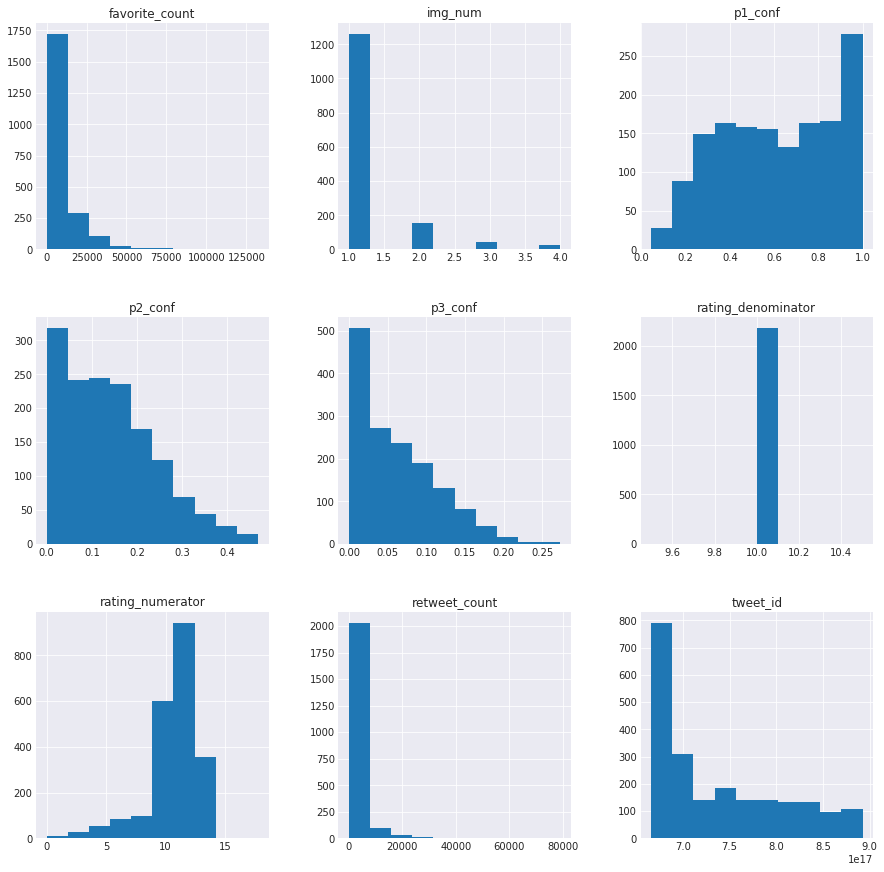

In [126]:
#进行基本信息概览
tweet_all.hist(figsize=(15,15))

通过上图可以看出：
1、favorite和retweet统计形状都明显右偏。大部分favorite或retweet数字都在20000以下，但最高值分别达到了125000和80000

2、不同图片的预测可信度差异较大。第一张图呈现左偏，一半以上案例的预测可信度都超过0.5；而第二张图和第三张图的统计形态都是右偏，大部分案例预测可信度都在0.2以下。

3、狗狗评分大都在8-15分之间，最低的低于5分

In [127]:
tweet_all[tweet_all['rating_numerator']<5]
#查看原推，3分的还有只猫

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,position,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
264,835152434251116546,2017-02-24 15:40:31,Twitter for iPhone,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0.0,10,,NaN,3425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621,777885040357281792,2016-09-19 15:00:20,Twitter for iPhone,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3.0,10,Wesley,NaN,1882,...,1.0,Afghan_hound,0.123529,True,basset,0.119682,True,Siberian_husky,0.108709,True
720,760252756032651264,2016-08-01 23:15:56,Twitter for iPhone,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,https://twitter.com/dog_rates/status/760252756032651264/photo/1,4.0,10,Fido,NaN,989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744,757596066325864448,2016-07-25 15:19:12,Twitter for iPhone,Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,https://twitter.com/dog_rates/status/757596066325864448/photo/1,4.0,10,,NaN,1206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
833,747816857231626240,2016-06-28 15:40:07,Twitter for iPhone,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4.0,10,a,NaN,1309,...,1.0,Pembroke,0.768923,True,Chihuahua,0.029053,True,Shetland_sheepdog,0.029035,True
844,746906459439529985,2016-06-26 03:22:31,Twitter for iPhone,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",https://twitter.com/dog_rates/status/746906459439529985/photo/1,0.0,10,,NaN,334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1017,718246886998687744,2016-04-08 01:19:36,Twitter for iPhone,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,https://twitter.com/dog_rates/status/718246886998687744/photo/1,3.0,10,Alexanderson,NaN,561,...,1.0,Chihuahua,0.354488,True,carton,0.159672,False,Siberian_husky,0.057498,True
1047,714631576617938945,2016-03-29 01:53:39,Twitter for iPhone,This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z,https://twitter.com/dog_rates/status/714631576617938945/photo/1,4.0,10,Benedict,NaN,1115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076,711306686208872448,2016-03-19 21:41:44,Twitter for iPhone,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,"https://twitter.com/dog_rates/status/711306686208872448/photo/1,https://twitter.com/dog_rates/status/711306686208872448/photo/1",3.0,10,,NaN,812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1129,707420581654872064,2016-03-09 04:19:44,Twitter for iPhone,This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,https://twitter.com/dog_rates/status/707420581654872064/photo/1,4.0,10,Keurig,NaN,785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


然后探索狗狗评分和地位、品种等变量的关系

In [128]:
kind = tweet_all[['p1','rating_numerator']]
kind1=kind.dropna(axis = 0)

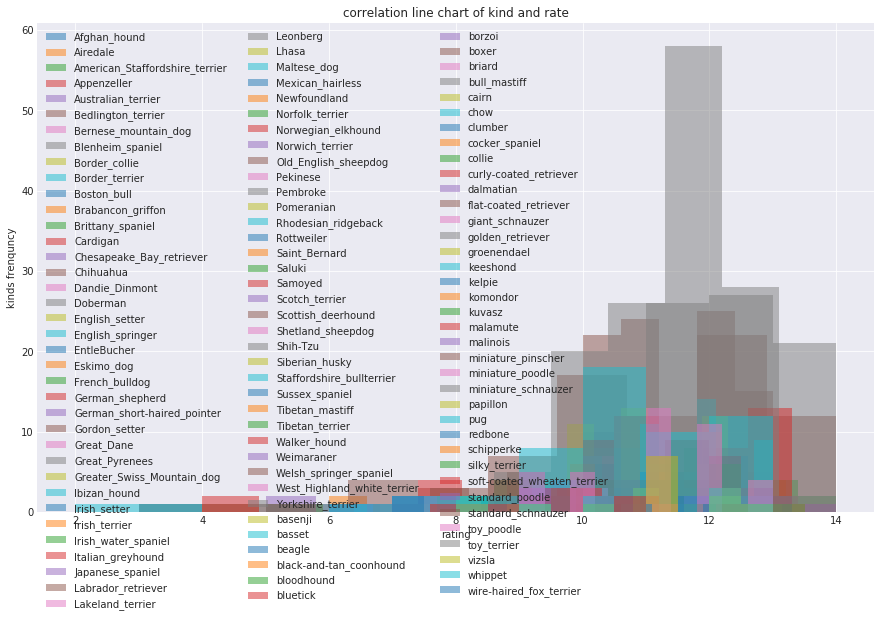

In [129]:
kind1.groupby(['p1'])['rating_numerator'].plot(kind='hist',alpha=0.5,figsize=(15,9))
plt.title('correlation line chart of kind and rate')
plt.xlabel('rating')
plt.ylabel('kinds frenquncy')
plt.legend(loc='upper left',ncol=3)

预想中不同品种的狗可能颜值区间会有明显差异，但在图表中看出评分靠前的犬类驳杂，可见评分者并无明显偏好。

In [130]:
#尝试进行分类
kinds=[]
for i in kind1.p1:
    if 'terrier' in i:
        k = 'terrier'
    if 'sheepdog' in i: 
        k = 'sheeepdog'
    if 'spaniel' in i:
        k= 'spaniel'
    if 'mastiff' in i:
        k='mastiff'
    if 'retriever' in i:
        k='retriever'
    if 'pinscher' in i:
        k= 'pinscher'
    if 'hound' in i:
        k='hound'
    if 'bulldog' in i:
        k='bulldog'
    if 'schnauzer' in i:
        k='schnauzer'
    if  'poodle' in i:
        k='petdog'
    if  'Chihuahua' in i:
        k='petdog'
    if  'setter' in i:
        k='setter'
    if 'husky' in i:
        k='king'
    if 'pembroke' in i:
        k='corgis'
    if 'Saluki' in i:
        k='hound'
    if 'Appenzeller' in i:
        k='hound'
    if 'pug' in i:
        k='bulldog'
    if 'basset' in i:
        k='hound'
    if 'kuvasz' in i:
        k='retriever'
    if 'papillon' in i:
        k='pet'
    if 'Pomeranian'in i:
        k='pet'
    if 'kelpie' in i:
        k='hound'
    if 'beagle' in i:
        k= 'hound'
    if 'malinois' in i:
        k="hound"
    if 'Samoyed' in i:
        k='king'
    if 'bluetick' in i:
        k='hound'
    if 'collie' in i:
        k = 'corgis'
    if 'vizsla' in i:
        k = 'hound '
    if 'Cardigen' in i:
        k= 'corgis'
    if 'Doberman' in i:
        k='hound'
    if 'Eskimo' in i:
        k='king'
    if 'EntleBucher' in i:
        k='corgis'
    if 'Leonberg' in i:
        k='mastiff'
    
        
    kinds.append(k)
print(kinds)

['petdog', 'petdog', 'hound', 'retriever', 'hound', 'pet', 'terrier', 'terrier', 'king', 'bulldog', 'bulldog', 'bulldog', 'retriever', 'retriever', 'retriever', 'retriever', 'king', 'bulldog', 'hound', 'hound', 'hound', 'king', 'petdog', 'retriever', 'bulldog', 'bulldog', 'spaniel', 'bulldog', 'bulldog', 'hound', 'hound', 'bulldog', 'bulldog', 'bulldog', 'hound', 'retriever', 'retriever', 'retriever', 'king', 'retriever', 'retriever', 'retriever', 'retriever', 'hound', 'king', 'king', 'retriever', 'petdog', 'pinscher', 'hound', 'hound', 'hound', 'hound ', 'hound', 'hound', 'bulldog', 'retriever', 'hound', 'hound', 'hound', 'hound', 'retriever', 'retriever', 'retriever', 'king', 'terrier', 'retriever', 'spaniel', 'retriever', 'retriever', 'retriever', 'hound ', 'retriever', 'bulldog', 'spaniel', 'spaniel', 'retriever', 'sheeepdog', 'retriever', 'retriever', 'hound', 'hound', 'retriever', 'retriever', 'retriever', 'retriever', 'petdog', 'petdog', 'retriever', 'retriever', 'retriever', 'c

In [131]:
kind1['kinds'] = kinds

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


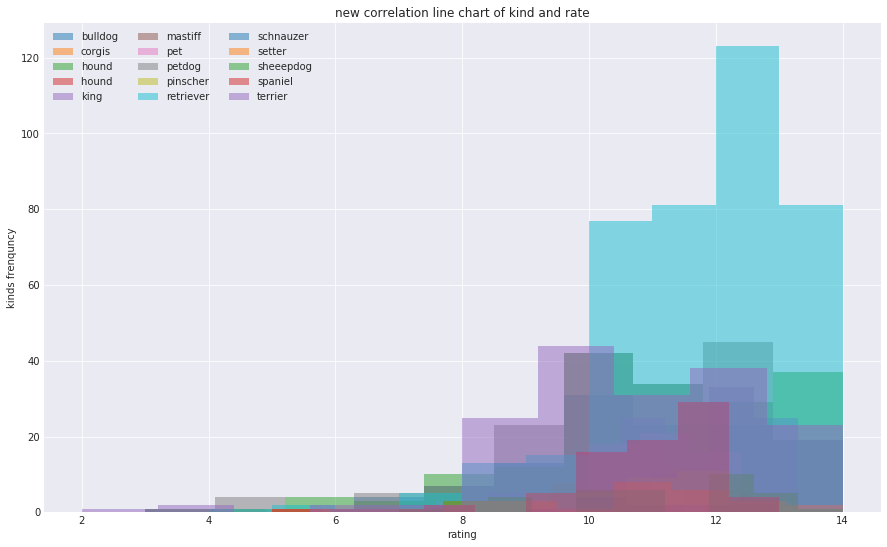

In [132]:
kind1.groupby(['kinds'])['rating_numerator'].plot(kind='hist',alpha=0.5,figsize=(15,9))
plt.title('new correlation line chart of kind and rate')
plt.xlabel('rating')
plt.ylabel('kinds frenquncy')
plt.legend(loc='upper left',ncol=3)
#依然是难解难分，但寻回犬似乎更集中在高分段。

分析狗狗地位和评分的关系

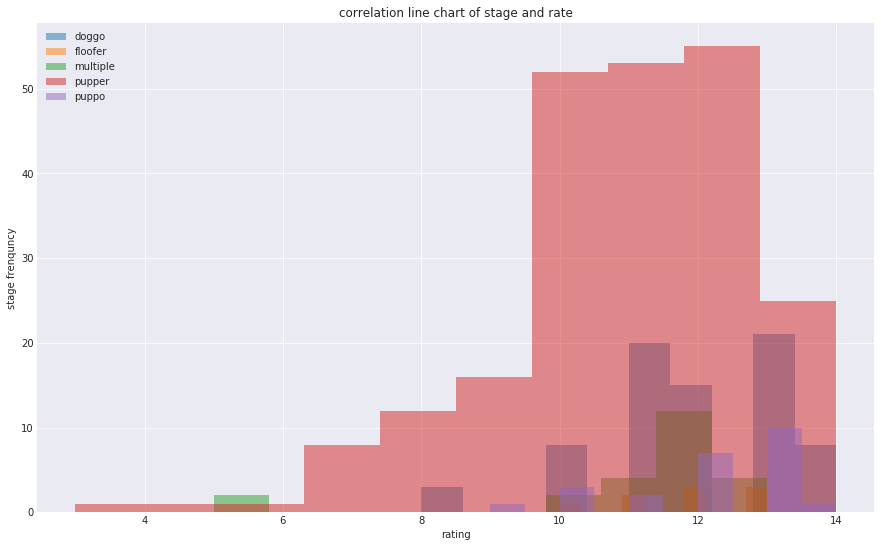

In [133]:
tweet_all.groupby(['position'])['rating_numerator'].plot(kind='hist',alpha=0.5,figsize=(15,9))
plt.title('correlation line chart of stage and rate')
plt.xlabel('rating')
plt.ylabel('stage frenquncy')
plt.legend(loc='upper left')

从总体形态来看，puppo和pupper似乎更受欢迎。但doogo\floofer基本不在低分段出现。

3、下一步，对推文内容制作词云。

In [134]:
from wordcloud import WordCloud

In [135]:
texts=[]
for i in tweet_all.text:
    i=i.split('/10')[0]
    texts.append(i)
    
texts_str=(" ".join(texts))
texts_str

'This is Phineas. He\'s a mystical boy. Only ever appears in the hole of a donut. 13 This is Tilly. She\'s just checking pup on you. Hopes you\'re doing ok. If not, she\'s available for pats, snugs, boops, the whole bit. 13 This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12 This is Darla. She commenced a snooze mid meal. 13 This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12 Here we have a majestic great white breaching off South Africa\'s coast. Absolutely h*ckin breathtaking. 13 Meet Jax. He enjoys ice cream so much he gets nervous around it. 13 When you watch your owner call another dog a good boy but then they turn back to you and say you\'re a great boy. 13 This is Zoey. She doesn\'t want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13 This is Cassie. She is a college pup. Studying international doggo communica

In [136]:
wordcloud = WordCloud().generate(texts_str)

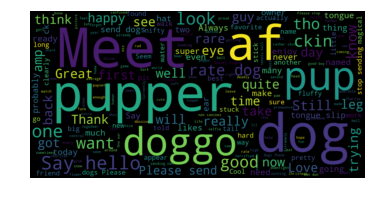

In [137]:

#max_font_size设定生成词云中的文字最大大小
#width,height,margin可以设置图片属性
# generate 可以对全部文本进行自动分词

wordcloud = WordCloud(max_font_size=66,scale=4).generate(texts_str)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

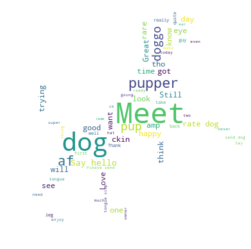

In [138]:

from scipy.misc import imread

#max_font_size设定生成词云中的文字最大大小
#width,height,margin可以设置图片属性
# generate 可以对全部文本进行自动分词
bg_pic=imread('black.png')
wordcloud = WordCloud(mask=bg_pic,background_color='white',max_font_size=100,scale=1.5).generate(texts_str)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [139]:
wordcloud.to_file('dog.jpg')